/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The mean of the center of cluster 1 is

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
18  19          5.006         3.418          1.464         0.244  Iris-setosa



The mean of the center of cluster 2 is

    Id  SepalLengthCm  ...  PetalWidthCm          Species
73  74       5.916949  ...      1.394915  Iris-versicolor

[1 rows x 6 columns]



The mean of the center of cluster 3 is

      Id  SepalLengthCm  ...  PetalWidthCm         Species
132  133       6.758537  ...      2.080488  Iris-virginica

[1 rows x 6 columns]



The Jaccard distance of cluster 1 is  0.0
The Jaccard distance of cluster 2 is  0.2
The Jaccard distance of cluster 3 is  0.23076923076923078


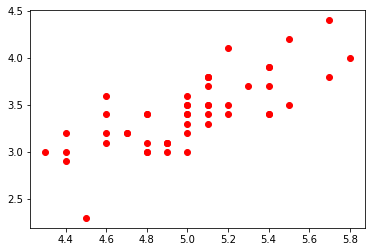

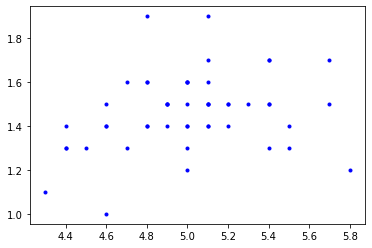

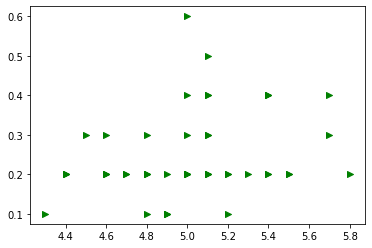

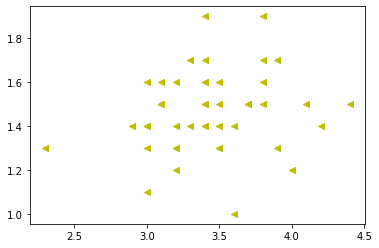

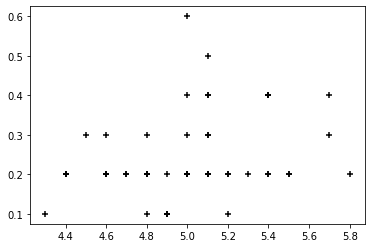

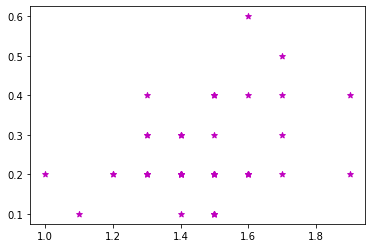

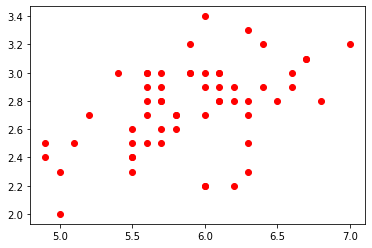

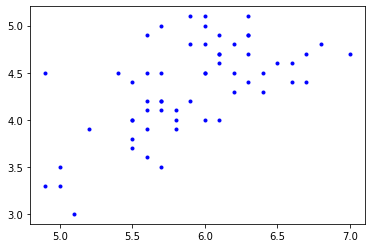

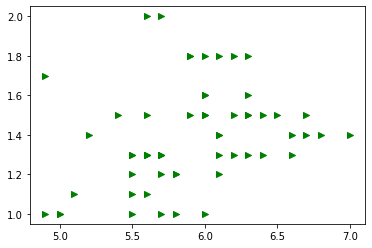

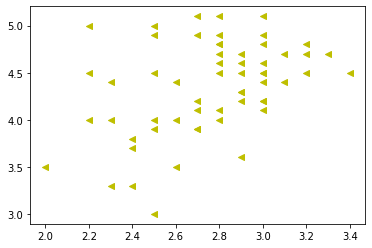

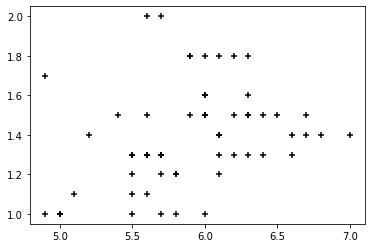

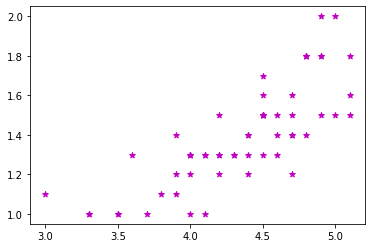

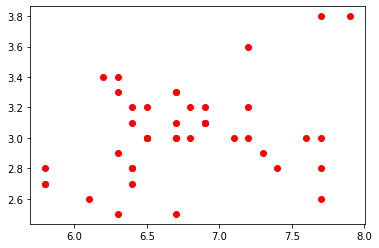

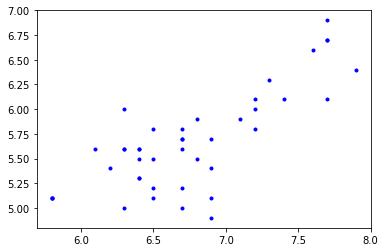

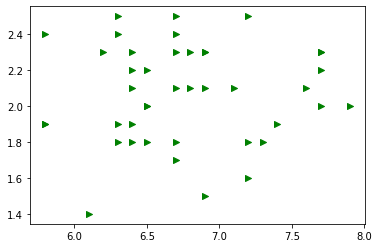

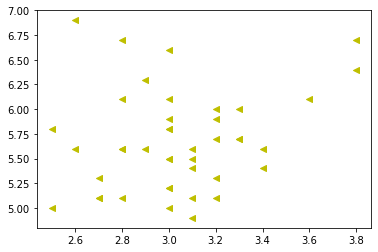

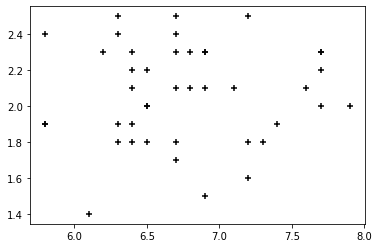

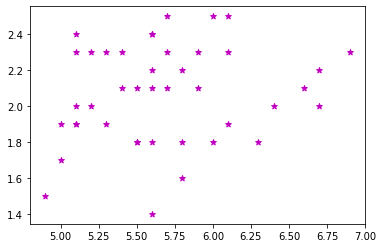

In [ ]:
# LOGIC
# Step 1 = We randomly assign values into the Cluster means denoted by C1_mean, C2_mean, C3_mean. 
# Step 2 = We initialise three dataframes C1, C2, C3 to store the data points which are close to Cluster 1, Cluster 2 and Cluster 3 repectively. 
# Step 3 = Using a for loop, we traverse all the data points in the Iris Dataset and find the distance of the data to each of the three Cluster mean values. 
# Step 4 = We find the minimum of these three distances, and assign the data point to that corresponding cluster. 
# Step 5 = We now find the mean of the data points in C1 and assign it to C1_mean. Similarly, we find the mean of the data points of C2 and C3 and assign it to C2_mean 
# and C3_mean repectively. 
# Step 6 = We do Step 3 to Step 5 a total of 10 times. 
# Step 7 = We print the cluster means, ie, C1_mean, C2_mean and C3_mean. 
# Step 8 = We now find the Jaccard distance of each cluster with the target values for each of the three clusters.


# Importing all the needed libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random




# d1 represents the distance of points in Iris Dataset from C1_mean
# d2 represents the distance of points in Iris Dataset from C2_mean
# d3 represents the distance of points in Iris Dataset from C3_mean

d1 = 0
d2 = 0
d3 = 0



# These values are initialised to 0 and will be used to find the updated means of the cluster centers.

avg_SepalLengthCm = 0
avg_SepalWidthCm = 0
avg_PetalLengthCm = 0
avg_PetalWidthCm = 0
sum = 0.0



# These values are initiaised to zero to help us while we find the Jaccard Distance

no_setosa = 0
no_versicolor = 0
no_virginica = 0



# C1 is the dataframe of all the data points of Iris Dataset which is closest to the center of cluster 1 after each iteration
# C2 is the dataframe of all the data points of Iris Dataset which is closest to the center of cluster 2 after each iteration
# C3 is the dataframe of all the data points of Iris Dataset which is closest to the center of cluster 3 after each iteration

C1 = pd.DataFrame()
C2 = pd.DataFrame()
C3 = pd.DataFrame()




# We take in the dataFrame, the size of the DatFrame and how many sampes we want.
# For our code, the correspodning values are df, 150 and 1 respectively

def randomize_mean (df, start, end, no_samples) :
  return df.iloc[random.sample(range(start, end), no_samples)]

# End of function



# Function to calculate the distance of the data point to any cluster center. 
# We take in the DataFrame, the no of integer columns we have in the DataFrame, distance (could be d1, d2, d3), 
# C_mean(could be C1_mean, C2_mean or C3_mean), and the iteration value i)
# We find the distance of a particular point of the DataFrame to one of the three cluster centers in this function

def data_distance (df, no_values, d, C_mean, i) :
  for p in range(1, (no_values+1)):
    d += pow((df.iloc[i][p] - C_mean.iloc[0][p]), 2)
  return (math.sqrt(d))

# End of function



# Function to calcualte the new mean of the cluster center attributes
# It takes in the Cluster (either 1, 2 or 3) and the attribute number, and returns the mean of that particular attribute

def clustermean_update (C, j, sum):
  for i in range(0, len(C)) : 
    sum += C.iloc[i][j]
  return (sum/len(C))

# End of function




# Function to return the Jaccard Distance
# We take the input cluster and count the number of occurances of set Setosa, Versicolor and Virginica
# Since we want the Jaccard distance to be as small as possible, there has to be maximum overlap between the two sets
# Jaccard distance is defined as 1-Intersection(A,B)/Union(A,B). Here, A is the Clusters, ie, C1, C2, C3. B is the original correct clusters each having 50 values
# Let the maximum occurence be, for example, no_setosa. Then A intersection B = no_setosa. A union B will be (len(A) - no_setosa + len(B)) by logic. len(B) = 50
# We use this fact to return the Jaccard Distance 

def jaccard_distance (C, no_setosa, no_versicolor, no_virginica) :
  for i in range (0, len(C)) :
    if (C.iloc[i][5] == "Iris-setosa"):
      no_setosa +=1
    
    if (C.iloc[i][5] == "Iris-versicolor") :
      no_versicolor+=1

    if (C.iloc[i][5] == "Iris-virginica") :
      no_virginica+=1

# End of for loop      

  if (max(no_setosa, no_versicolor, no_virginica) == no_setosa) : 
    return ((len(C) + 50 - 2*no_setosa)/(len(C) + 50 - no_setosa))

  elif (max(no_setosa, no_versicolor, no_virginica) == no_versicolor) : 
    return ((len(C) + 50 - 2*no_versicolor)/(len(C) + 50 - no_versicolor))

  elif (max(no_setosa, no_versicolor, no_virginica) == no_virginica) :
    return ((len(C) + 50 - 2*no_virginica)/(len(C) + 50 - no_virginica))

# End of function




# Function used to find the scatter plot 
# The input is two DataFrames, a marker and the color. 

def scatter_plot (C_1, C_2, mark, colour) :
  plt.scatter(C_1, C_2, marker = mark, color = colour)
  plt.show()

# End of Function



# Function to calculate the distance of the data point to any cluster center. 
# We take in the DataFrame,  distance (could be d1, d2, d3), C_mean(could be C1_mean, C2_mean or C3_mean), and the iteration value i
# We find the distance of a particular point of the DataFrame to one of the three cluster centers in this function
# We use this since, the inbuilt append function of python changes the column order, ie, it sorts it alphabetically
# I tried to change this, but couldn't. So modified the i values used to find the distance. 
# Before appending, the column order is ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', PetalWidthCm']
# After appending, the column order is ['PetalLengthCm', PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm' ]

def data_distance1 (df, d, C_mean, i) :
  d = (pow((df.iloc[i][1] - C_mean.iloc[0][3]), 2) + pow((df.iloc[i][2] - C_mean.iloc[0][4]), 2) + pow((df.iloc[i][3] - C_mean.iloc[0][1]), 2) + pow((df.iloc[i][4] - C_mean.iloc[0][2]), 2) )
  return (math.sqrt(d))





# Reading the dataset Iris.csv into our DataFrame df

df = pd.read_csv('Iris.csv')




# We randomly assign three data points to the three cluster center means C1_mean, C2_mean, C3_mean
# Im randomizing , making sure all the cluster means are from seperate classes. But we can do total randomiser too.

C1_mean = randomize_mean(df, 0, 50, 1)
C2_mean = randomize_mean(df, 50, 100, 1)
C3_mean = randomize_mean(df, 100, 150, 1)




# We are now having a for loop to find the distance between all the points in iris dataframe contained inside df.
# We then find the minimum of (d1, d2, d3) and add that particular data point to the corresponding Cluster

for i in range(0, 150): 
  d1 = data_distance(df, 4, 0, C1_mean, i)
  d2 = data_distance(df, 4, 0, C2_mean, i)
  d3 = data_distance(df, 4, 0, C3_mean, i)
 
  if (min(d1, d2, d3) == d1) : 
    C1 = C1.append(df.iloc[i])

  elif (min(d1, d2, d3) == d2) :
    C2 = C2.append(df.iloc[i])

  elif (min(d1, d2, d3) == d3) :
    C3 = C3.append(df.iloc[i])

    
# End of for loop


# We now run this 10 times 

for p in range (0,10) :

  # We use duplicate DataFrames, called C_updated, to update the C_mean
  C1_updated = pd.DataFrame()
  C2_updated = pd.DataFrame()
  C3_updated = pd.DataFrame() 

  for i in range(0, len(C1)): 

    # If p ==0, we have already found the distance, and added the data points to the cluster C, and hence we skip this

    if (p==0) : 
      break

    d1 = data_distance1(C1, 0, C1_mean, i)
    d2 = data_distance1(C1, 0, C2_mean, i)
    d3 = data_distance1(C1, 0, C3_mean, i)
  
    if (min(d1, d2, d3) == d1) : 
      C1_updated = C1_updated.append(C1.iloc[i])

    elif (min(d1, d2, d3) == d2) :
      C2_updated = C2_updated.append(C1.iloc[i])

    elif (min(d1, d2, d3) == d3) :
      C3_updated = C3_updated.append(C1.iloc[i])


  for i in range(0, len(C2)): 

    # If p ==0, we have already found the distance, and added the data points to the cluster C, and hence we skip this

    if (p==0) : 
      break

    d1 = data_distance1(C2, 0, C1_mean, i)
    d2 = data_distance1(C2, 0, C2_mean, i)
    d3 = data_distance1(C2, 0, C3_mean, i)

    if (min(d1, d2, d3) == d1) : 
      C1_updated = C1_updated.append(C2.iloc[i])
      
    elif (min(d1, d2, d3) == d2) :
      C2_updated = C2_updated.append(C2.iloc[i])

    elif (min(d1, d2, d3) == d3) :
      C3_updated = C3_updated.append(C2.iloc[i])

    
  for i in range(0, len(C3)): 

    # If p ==0, we have already found the distance, and added the data points to the cluster C, and hence we skip this

    if (p==0) : 
      break
      
    d1 = data_distance(C3, 4, 0, C1_mean, i)
    d2 = data_distance(C3, 4, 0, C2_mean, i)
    d3 = data_distance(C3, 4, 0, C3_mean, i)

    if (min(d1, d2, d3) == d1) : 
      C1_updated = C1_updated.append(C3.iloc[i])
      
    elif (min(d1, d2, d3) == d2) :
      C2_updated = C2_updated.append(C3.iloc[i])

    elif (min(d1, d2, d3) == d3) :
      C3_updated = C3_updated.append(C3.iloc[i])





  # We take the mean of all SepalLengthCm in C1 and assign that to the value of SepalLengthCm in C1_mean
  # We take the mean of all SepalWidthCm in C1 and assign that to the value of SepalWidthCm in C1_mean
  # We take the mean of all PetalLengthCm in C1 and assign that to the value of PetalLengthCm in C1_mean
  # We take the mean of all PetalWidthCm in C1 and assign that to the value of PetalWidthCm in C1_mean

  # We do the same thing for C2, and C3 for all the four data attributes

  # Note that its hard or maybe even impossible to use a function for this, as in python value updation within functions 
  # won't reflect on the original values.

  # Since, I'm facing an issue with the column order between C and C_mean, the indexes will be different for these both

  C1_mean.iloc[0,3] = clustermean_update(C1, 1, sum)
  C1_mean.iloc[0,4] = clustermean_update(C1, 2, sum)
  C1_mean.iloc[0,1] = clustermean_update(C1, 3, sum)
  C1_mean.iloc[0,2] = clustermean_update(C1, 4, sum)


  C2_mean.iloc[0,3] = clustermean_update(C2, 1, sum)
  C2_mean.iloc[0,4] = clustermean_update(C2, 2, sum)
  C2_mean.iloc[0,1] = clustermean_update(C2, 3, sum)
  C2_mean.iloc[0,2] = clustermean_update(C2, 4, sum)


  C3_mean.iloc[0,3] = clustermean_update(C3, 1, sum)
  C3_mean.iloc[0,4] = clustermean_update(C3, 2, sum)
  C3_mean.iloc[0,1] = clustermean_update(C3, 3, sum)
  C3_mean.iloc[0,2] = clustermean_update(C3, 4, sum)

 


# We now print the mean of all the three Cluster center means

print ("The mean of the center of cluster 1 is\n")
print (C1_mean)
print ("\n\n")
print ("The mean of the center of cluster 2 is\n")
print (C2_mean)
print ("\n\n")
print ("The mean of the center of cluster 3 is\n")
print (C3_mean)
print ("\n\n")




# We now print the Jaccard Distance of each of the clusters. 
# Jaccard distance is defined as 1-Intersection(A,B)/Union(A,B)
# Here, A is the Clusters, ie, C1, C2, C3
# B is the original correct clusters each having 50 values
# We find the min of all the Jaccard Distances and assign that as the Jaccard Distance for our particular cluster

print ("The Jaccard distance of cluster 1 is ", jaccard_distance(C1_updated, 0, 0, 0))
print ("The Jaccard distance of cluster 2 is ", jaccard_distance(C2_updated, 0, 0, 0))
print ("The Jaccard distance of cluster 3 is ", jaccard_distance(C3_updated, 0, 0, 0))



# We now plot the scatter plot of the Clusters C1, C2, C3
# We use the function scatter_plot() for this
# Since we have 4 features, there are 4C2 = 6 possibole plots for each cluster. So a total of 16 plots
# We could have used pairwise plotting of seaborn to make this easier, but not using that library as stated

# All the cluster plots for Cluster 1
scatter_plot (C1_updated.SepalLengthCm, C1_updated.SepalWidthCm, 'o', 'r')
scatter_plot (C1_updated.SepalLengthCm, C1_updated.PetalLengthCm, '.', 'b')
scatter_plot (C1_updated.SepalLengthCm, C1_updated.PetalWidthCm, '>', 'g')
scatter_plot (C1_updated.SepalWidthCm, C1_updated.PetalLengthCm, '<', 'y')
scatter_plot (C1_updated.SepalLengthCm, C1_updated.PetalWidthCm, '+', 'k')
scatter_plot (C1_updated.PetalLengthCm, C1_updated.PetalWidthCm, '*', 'm')

# All the cluster plots for Cluster 2
scatter_plot (C2_updated.SepalLengthCm, C2_updated.SepalWidthCm, 'o', 'r')
scatter_plot (C2_updated.SepalLengthCm, C2_updated.PetalLengthCm, '.', 'b')
scatter_plot (C2_updated.SepalLengthCm, C2_updated.PetalWidthCm, '>', 'g')
scatter_plot (C2_updated.SepalWidthCm, C2_updated.PetalLengthCm, '<', 'y')
scatter_plot (C2_updated.SepalLengthCm, C2_updated.PetalWidthCm, '+', 'k')
scatter_plot (C2_updated.PetalLengthCm, C2_updated.PetalWidthCm, '*', 'm')

# All the cluster plots for Cluster 3
scatter_plot (C3_updated.SepalLengthCm, C3_updated.SepalWidthCm, 'o', 'r')
scatter_plot (C3_updated.SepalLengthCm, C3_updated.PetalLengthCm, '.', 'b')
scatter_plot (C3_updated.SepalLengthCm, C3_updated.PetalWidthCm, '>', 'g')
scatter_plot (C3_updated.SepalWidthCm, C3_updated.PetalLengthCm, '<', 'y')
scatter_plot (C3_updated.SepalLengthCm, C3_updated.PetalWidthCm, '+', 'k')
scatter_plot (C3_updated.PetalLengthCm, C3_updated.PetalWidthCm, '*', 'm')